In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
start_date = '2021-12-23'
end_date   = '2022-02-28'

## Setup Global Plotting Parameters

In [3]:
plt.figure()
plt.rcParams.update({'font.size': 16}) # must set at the top. It controls text size in charts and plots

<Figure size 432x288 with 0 Axes>

##  Find File Containing Initial Purchase and Allocations

In [4]:
# Get the data for the portfolio
_initial_purchase_file = "2022 Weighted Crypto Portfolio.csv"
_data_folder           = "./data/"

init_portfolio_path = os.path.join(_data_folder, _initial_purchase_file)
init_portfolio_path

'./data/2022 Weighted Crypto Portfolio.csv'

In [5]:
init_portfolio = pd.read_csv(init_portfolio_path).set_index('Coin', drop=True)
init_portfolio

,Amount,Net Cost,Fees,Investment,Cost Basis
Coin,,,,,
BTC,0.000307,15.00,0.07,14.93,48623.690000
ETH,0.003787,15.00,0.07,14.93,3941.660000
BNB,0.023982,12.70,0.01,12.69,529.003900
SOL,0.058000,10.50,0.05,10.45,179.330000
ADA,7.120000,9.75,0.05,9.70,1.361600
WLUNA,0.104000,9.80,0.05,9.75,93.220000
AVAX,0.080000,9.79,0.05,9.74,121.330000
DOT,0.352000,9.80,0.05,9.75,27.680000
DOGE,42.300000,7.60,0.04,7.56,0.177400


### Initial Allocation Percentages

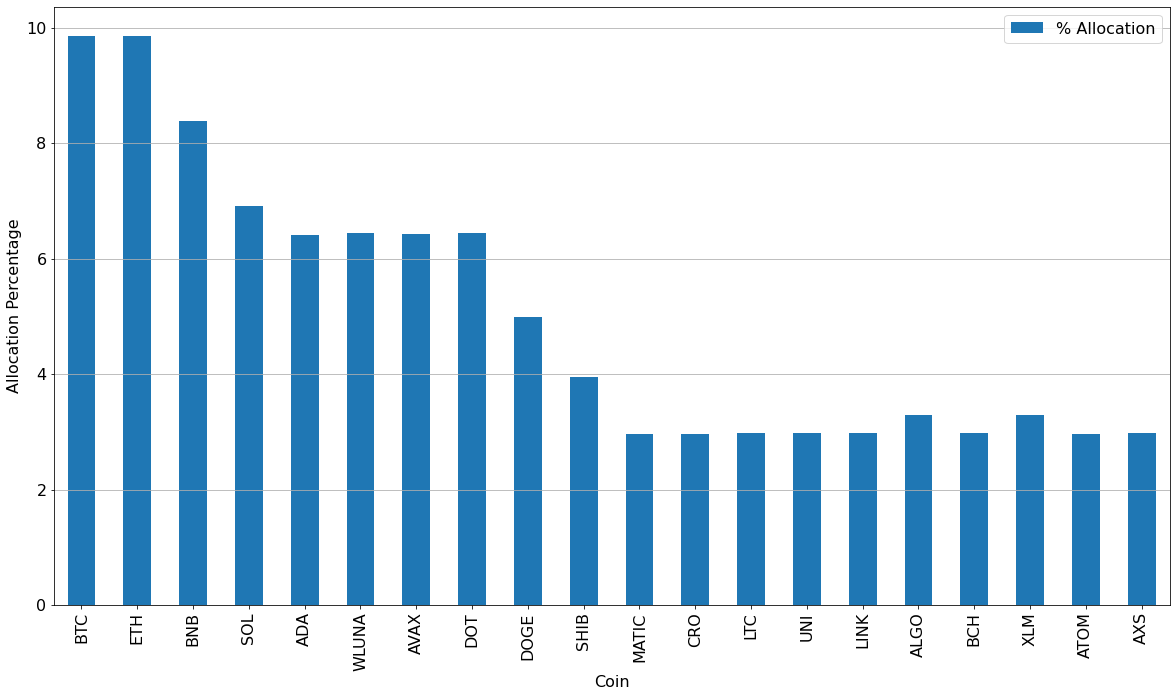

In [6]:
total = init_portfolio['Investment'].sum()

init_portfolio['% Allocation'] = (init_portfolio['Investment'] / total) * 100

ax = init_portfolio['% Allocation'].plot(kind='bar',
                                         grid=False,
                                         ylabel="Allocation Percentage",
                                         figsize=(20,11))

ax.grid(axis='y')
ax.legend()

##  Open File With Historic Closing Data

In [7]:
_file           = "2022_portfolio_daily_close.csv"
_data_folder    = "./data"

historic_file_path = os.path.join(_data_folder, _file)

In [8]:
historic_df = pd.read_csv(historic_file_path).set_index('date')
historic_df

,BTC,ETH,BNB,SOL,ADA,WLUNA,AVAX,DOT,DOGE,SHIB,MATIC,CRO,LTC,UNI,LINK,ALGO,BCH,XLM,ATOM,AXS
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,50842.20,4113.08,549.0,190.07,1.4743,94.42,121.37,29.17,0.1851,0.000039,2.6858,0.5951,163.74,18.18,22.19,1.4697,455.93,0.287776,28.38,107.47
2021-12-24,50851.38,4049.65,542.1,190.65,1.3935,95.77,114.93,28.17,0.1862,0.000036,2.4687,0.6280,161.35,17.50,21.47,1.5760,452.27,0.278628,26.87,104.62
2021-12-25,50428.31,4097.43,547.4,193.06,1.4542,98.39,114.86,28.86,0.1911,0.000038,2.6409,0.6434,158.00,17.49,22.12,1.5748,455.36,0.290047,29.79,109.27
2021-12-26,50801.79,4065.91,546.4,198.00,1.4549,99.63,115.07,31.34,0.1899,0.000038,2.8793,0.6233,155.96,18.67,22.99,1.6079,451.86,0.291987,32.17,107.62
2021-12-27,50717.77,4038.64,563.7,195.74,1.5164,90.88,113.96,30.97,0.1879,0.000039,2.7267,0.6234,155.78,19.11,23.02,1.6631,465.45,0.300288,29.68,107.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,38347.30,2597.42,361.2,89.41,0.8533,65.16,76.41,16.17,0.1242,0.000024,1.4414,0.3952,104.24,8.82,13.27,0.7779,300.96,0.182403,24.86,48.82
2022-02-25,39238.48,2769.52,375.0,92.84,0.8997,73.07,81.05,17.28,0.1277,0.000025,1.5525,0.4183,109.33,9.25,14.39,0.8312,309.04,0.191142,27.30,51.16
2022-02-26,39137.80,2780.71,373.7,90.32,0.8873,78.13,81.79,18.04,0.1277,0.000024,1.5161,0.4142,108.29,9.06,14.72,0.8598,315.56,0.192899,29.89,50.44


## Plot of Normalized Price Data
This is a plot of the price movement in every coin, but normalized so they all fit in the same vertical range. It's just easier to see.

In [9]:
#normalize by doing (df - mean(df)) / std(df)
normalized_df = (historic_df - historic_df.mean()) / historic_df.std()

<AxesSubplot:xlabel='date'>

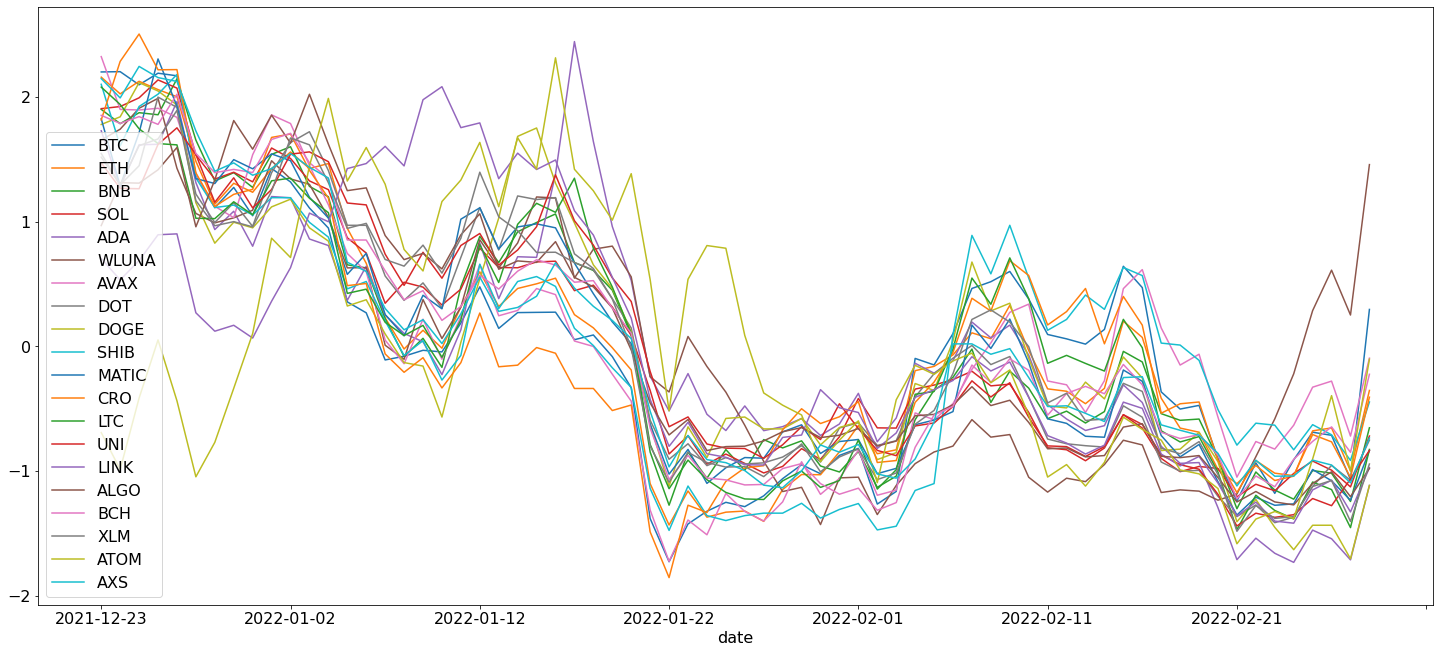

In [10]:
normalized_df.plot(figsize=(25,11),)

### Tracking Investment

In [11]:
init_investments = init_portfolio['Amount']
init_investments

Coin
BTC           0.000307
ETH           0.003787
BNB           0.023982
SOL           0.058000
ADA           7.120000
WLUNA         0.104000
AVAX          0.080000
DOT           0.352000
DOGE         42.300000
SHIB     164383.000000
MATIC         1.700000
CRO           7.800000
LTC           0.028594
UNI           0.259222
LINK          0.210000
ALGO          3.000000
BCH           0.010157
XLM          16.000000
ATOM          0.100000
AXS           0.043000
Name: Amount, dtype: float64

In [12]:
init_portfolio.columns

Index(['Amount', 'Net Cost', 'Fees', 'Investment', 'Cost Basis',
       '% Allocation'],
      dtype='object')

In [13]:
value_df = historic_df.multiply(init_investments, axis=1)
value_df

,BTC,ETH,BNB,SOL,ADA,WLUNA,AVAX,DOT,DOGE,SHIB,MATIC,CRO,LTC,UNI,LINK,ALGO,BCH,XLM,ATOM,AXS
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,15.606013,15.574465,13.166118,11.02406,10.497016,9.81968,9.7096,10.26784,7.82973,6.361622,4.56586,4.64178,4.681941,4.712656,4.6599,4.4091,4.630662,4.604416,2.838,4.62121
2021-12-24,15.608831,15.334283,13.000642,11.05770,9.921720,9.96008,9.1944,9.91584,7.87626,5.950665,4.19679,4.89840,4.613602,4.536385,4.5087,4.7280,4.593489,4.458048,2.687,4.49866
2021-12-25,15.478970,15.515206,13.127747,11.19748,10.353904,10.23256,9.1888,10.15872,8.08353,6.213677,4.48953,5.01852,4.517812,4.533793,4.6452,4.7244,4.624873,4.640752,2.979,4.69861
2021-12-26,15.593609,15.395853,13.103765,11.48400,10.358888,10.36152,9.2056,11.03168,8.03277,6.295869,4.89481,4.86174,4.459481,4.839675,4.8279,4.8237,4.589325,4.671792,3.217,4.62766
2021-12-27,15.567820,15.292593,13.518653,11.35292,10.796768,9.45152,9.1168,10.90144,7.94817,6.427375,4.63539,4.86252,4.454334,4.953732,4.8342,4.9893,4.727352,4.804608,2.968,4.60315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,11.770704,9.835313,8.662298,5.18578,6.075496,6.77664,6.1128,5.69184,5.25366,3.923822,2.45038,3.08256,2.980612,2.286338,2.7867,2.3337,3.056706,2.918448,2.486,2.09926
2022-02-25,12.044251,10.486981,8.993250,5.38472,6.405864,7.59928,6.4840,6.08256,5.40171,4.091493,2.63925,3.26274,3.126155,2.397804,3.0219,2.4936,3.138771,3.058272,2.730,2.19988
2022-02-26,12.013348,10.529353,8.962073,5.23856,6.317576,8.12552,6.5432,6.35008,5.40171,4.024096,2.57737,3.23076,3.096417,2.348551,3.0912,2.5794,3.204991,3.086384,2.989,2.16892


In [14]:
value_df['total'] = value_df.sum(axis=1)

In [15]:
value_df

,BTC,ETH,BNB,SOL,ADA,WLUNA,AVAX,DOT,DOGE,SHIB,...,CRO,LTC,UNI,LINK,ALGO,BCH,XLM,ATOM,AXS,total
date,,,,,,,,,,,,,,,,,,,,,
2021-12-23,15.606013,15.574465,13.166118,11.02406,10.497016,9.81968,9.7096,10.26784,7.82973,6.361622,...,4.64178,4.681941,4.712656,4.6599,4.4091,4.630662,4.604416,2.838,4.62121,154.221669
2021-12-24,15.608831,15.334283,13.000642,11.05770,9.921720,9.96008,9.1944,9.91584,7.87626,5.950665,...,4.89840,4.613602,4.536385,4.5087,4.7280,4.593489,4.458048,2.687,4.49866,151.539495
2021-12-25,15.478970,15.515206,13.127747,11.19748,10.353904,10.23256,9.1888,10.15872,8.08353,6.213677,...,5.01852,4.517812,4.533793,4.6452,4.7244,4.624873,4.640752,2.979,4.69861,154.423084
2021-12-26,15.593609,15.395853,13.103765,11.48400,10.358888,10.36152,9.2056,11.03168,8.03277,6.295869,...,4.86174,4.459481,4.839675,4.8279,4.8237,4.589325,4.671792,3.217,4.62766,156.676637
2021-12-27,15.567820,15.292593,13.518653,11.35292,10.796768,9.45152,9.1168,10.90144,7.94817,6.427375,...,4.86252,4.454334,4.953732,4.8342,4.9893,4.727352,4.804608,2.968,4.60315,156.206646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,11.770704,9.835313,8.662298,5.18578,6.075496,6.77664,6.1128,5.69184,5.25366,3.923822,...,3.08256,2.980612,2.286338,2.7867,2.3337,3.056706,2.918448,2.486,2.09926,95.769058
2022-02-25,12.044251,10.486981,8.993250,5.38472,6.405864,7.59928,6.4840,6.08256,5.40171,4.091493,...,3.26274,3.126155,2.397804,3.0219,2.4936,3.138771,3.058272,2.730,2.19988,101.042481
2022-02-26,12.013348,10.529353,8.962073,5.23856,6.317576,8.12552,6.5432,6.35008,5.40171,4.024096,...,3.23076,3.096417,2.348551,3.0912,2.5794,3.204991,3.086384,2.989,2.16892,101.878510


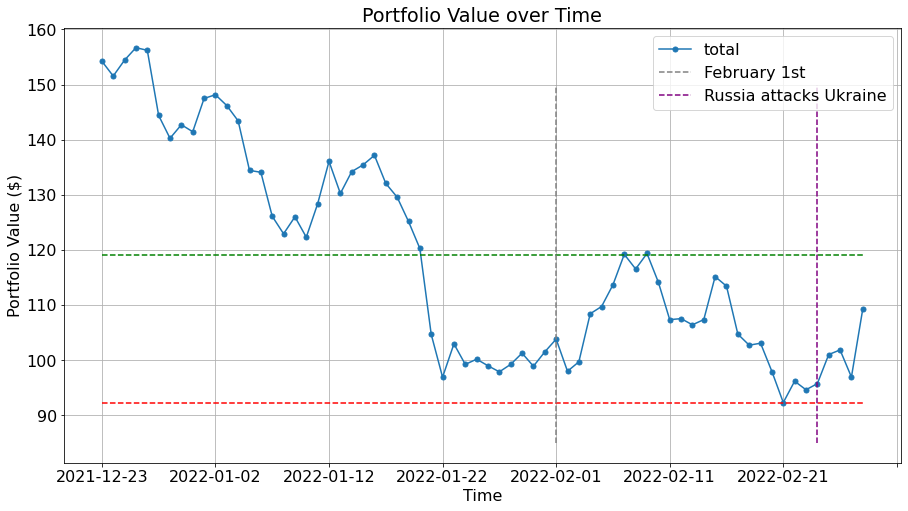

In [44]:
ax = value_df['total'].plot(figsize=(15,8), 
                            ylabel='Portfolio Value ($)', 
                            xlabel='Time',
                            marker='.', 
                            markersize=10,
                            title="Portfolio Value over Time",
                            grid=True)

#ax.grid('on', which='minor', axis='y' )
#ax.grid('off', which='major', axis='y',)# linestyle='-', linewidth=0.25,)
#ax.hlines(value_df['total'].min(), ax.get_xticks()[0], ax.get_xticks()[-1], linestyle='--', color='red')
#ax.hlines(114, ax.get_xticks()[0], ax.get_xticks()[-1], linestyle='--', color='green')

#------- Creating Horizontal and Vertical Lines For Important Dates
xmin = 0
xmax = 67
ymin = 85
ymax = 150

ax.hlines(value_df['total'].min(), xmin=xmin, xmax=xmax, linestyle='--', color='red')
ax.hlines(119, xmin=xmin, xmax=xmax, linestyle='--', color='green')

#ax.vlines('10', ax.get_yticks().min(), ax.get_yticks().max(), linestyle='--', color='white')
#ax.vlines(40, ax.get_yticks().min(), ax.get_yticks().max(), linestyle='--', color='gray', label="February 1st")
#ax.vlines(63, ax.get_yticks().min(), ax.get_yticks().max(), linestyle='--', color='purple', label="Russia attacks Ukraine")

ax.vlines(40, ymin=ymin, ymax=ymax, linestyle='--', color='gray', label="February 1st")
ax.vlines(63, ymin=ymin, ymax=ymax, linestyle='--', color='purple', label="Russia attacks Ukraine")


#------- Makes Line lables show up
ax.legend()

#ax.plot(pad_inches=0)

## Plot Changes in Allocation Percentages
In this plot, I will show a comparison between the initial allocation vs the current allocation percentages.

In [27]:
# Compute new allocation percentages
current_values = value_df['2022-02-28':].drop('total', axis=1).transpose()['2022-02-28']
current_allocation = ((current_values / current_values.sum()) * 100)
current_allocation

BTC      12.128733
ETH      10.125688
BNB       8.679197
SOL       5.292187
ADA       6.279063
WLUNA     8.690248
AVAX      6.190801
DOT       6.102246
DOGE      5.162191
SHIB      3.881349
MATIC     2.510096
CRO       3.134683
LTC       2.977334
UNI       2.497112
LINK      2.908593
ALGO      2.383301
BCH       3.152305
XLM       2.893407
ATOM      2.870720
AXS       2.140745
Name: 2022-02-28, dtype: float64

In [28]:
index = current_allocation.index
index

Index(['BTC', 'ETH', 'BNB', 'SOL', 'ADA', 'WLUNA', 'AVAX', 'DOT', 'DOGE',
       'SHIB', 'MATIC', 'CRO', 'LTC', 'UNI', 'LINK', 'ALGO', 'BCH', 'XLM',
       'ATOM', 'AXS'],
      dtype='object')

In [29]:
comparison_df = pd.DataFrame({'Orginal % Allocation':init_portfolio['% Allocation'],
                              'Current % Allocation':current_allocation}, index=index)

In [30]:
comparison_df

,Orginal % Allocation,Current % Allocation
BTC,9.862597,12.128733
ETH,9.862597,10.125688
BNB,8.382878,8.679197
SOL,6.903158,5.292187
ADA,6.407716,6.279063
WLUNA,6.440745,8.690248
AVAX,6.434139,6.190801
DOT,6.440745,6.102246
DOGE,4.994055,5.162191
SHIB,3.943718,3.881349


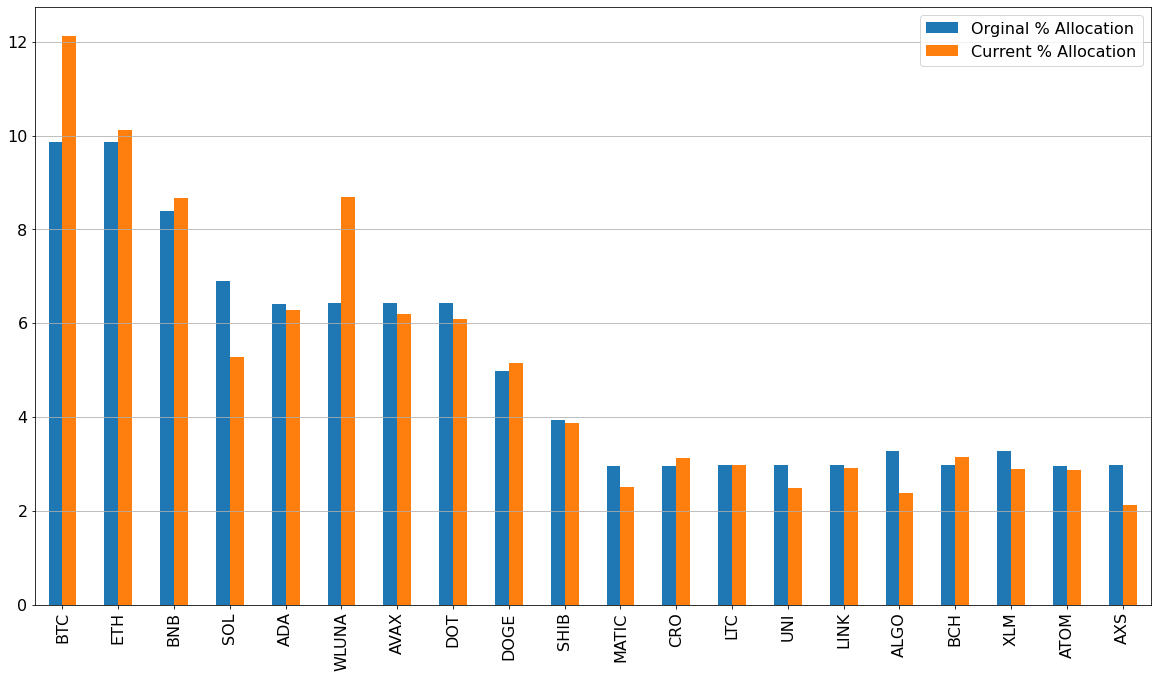

In [42]:
ax = comparison_df.plot(kind = 'bar',
                        y    = ["Orginal % Allocation", "Current % Allocation"],
                        figsize = (20,11),)

ax.grid(axis='y')
ax.legend()

## Monthly Performance

In [58]:
_month_init = value_df['total'].loc['2022-02-01']
_month_end  = value_df['total'].loc['2022-02-28']
_percent_change = ((_month_end - _month_init) / _month_init) * 100

_monthly_min = value_df['total']['2022-02-01':'2022-02-28'].min()
_monthly_max = value_df['total']['2022-02-01':'2022-02-28'].max()

print(f"Initial Value : ${_month_init:.2f}")
print(f"Final Value   : ${_month_end:.2f}")
print(f"Value Change  : ${_month_end - _month_init:.2f}\n")

print(f"Lowest Value  : ${_monthly_min:.2f}")
print(f"Highest Value : ${_monthly_max:.2f}\n")

print(f"Monthly Gain/Loss (%): {_percent_change:.2f}")

Initial Value : $103.84
Final Value   : $109.31
Value Change  : $5.47

Lowest Value  : $92.34
Highest Value : $119.36

Monthly Gain/Loss (%): 5.27


## Total Performance
Performance since portfolio inception.

In [59]:
_total_init = value_df['total'].loc['2021-12-23']
_total_end  = value_df['total'].loc['2022-02-28']
_total_percent_change = ((_total_end - _total_init) / _total_init) * 100

_total_min = value_df['total'].min()
_total_max = value_df['total'].max()

print(f"Initial Value : ${_total_init:.2f}")
print(f"Final Value   : ${_total_end:.2f}")
print(f"Value Change  : ${_total_end - _total_init:.2f}\n")

print(f"Lowest Value  : ${_total_min:.2f}")
print(f"Highest Value : ${_total_max:.2f}\n")

print(f"Monthly Gain/Loss (%): {_total_percent_change:.2f}")

Initial Value : $154.22
Final Value   : $109.31
Value Change  : $-44.91

Lowest Value  : $92.34
Highest Value : $156.68

Monthly Gain/Loss (%): -29.12
